In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [128]:
%pwd

'/home/abhishek/Desktop/embedded machine learning/maestro-master'

In [129]:
path = %pwd

In [130]:
import os
import glob
x=[]
extension = 'csv'
os.chdir(path)
result = glob.glob('Res*.{}'.format(extension))
results = glob.glob('vgg*.{}'.format(extension))
print(result)
print(results)
x =['yxp_os','nlr','xp_ws','rs']
print(x)


RES_early = []
RES_point = []
RES_late =[]
RES_residual =[]
RES_fclayer = []

RES_early_pow = []
RES_point_pow = []
RES_late_pow =[]
RES_residual_pow =[]
RES_fclayer_pow = []



vgg16_early = []
vgg16_point = []
vgg16_late =[]
vgg16_residual =[]
vgg16_fclayer = []

vgg16_early_pow = []
vgg16_point_pow = []
vgg16_late_pow =[]
vgg16_residual_pow =[]
vgg16_fclayer_pow = []


['Resnet50_xp_ws.csv', 'Resnet50_rs.csv', 'Resnet50_yxp_os.csv', 'Resnet50_nlr.csv']
['vgg16_xp_ws.csv', 'vgg16_rs.csv', 'vgg16_yxp_os.csv', 'vgg16_nlr.csv']
['yxp_os', 'nlr', 'xp_ws', 'rs']


In [131]:
resnet50_yxp_os = pd.read_csv (path+"/"+result[2]) 
resnet50_nlr = pd.read_csv (path+"/"+result[3])  
resnet50_xp_ws = pd.read_csv (path+"/"+result[0])  
resnet50_rs = pd.read_csv (path+"/"+result[1])  


In [132]:
vgg16_yxp_os = pd.read_csv (path+"/"+results[2]) 
vgg16_nlr = pd.read_csv (path+"/"+results[3])  
vgg16_xp_ws = pd.read_csv (path+"/"+results[0])  
vgg16_rs = pd.read_csv (path+"/"+results[1])  


In [133]:
early_layer = resnet50_yxp_os[resnet50_yxp_os[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
RES_early.append(sum(early_layer[' Runtime (Cycles)'].values))
RES_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [134]:
residual = Resnet50_yxp_os[Resnet50_yxp_os[' Layer Number'].str.contains('Residual')].reset_index(drop=True)
RES_residual.append(sum(residual[' Runtime (Cycles)'].values))
RES_residual_pow.append(sum(residual[' Activity count-based Energy (nJ)'].values)*0.001)


In [135]:
late_layer =  resnet50_yxp_os[0:-1]
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('_1_1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('Residual')].reset_index(drop=True)
RES_late.append(sum(late_layer[' Runtime (Cycles)'].values))
RES_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [136]:
pointwise = resnet50_yxp_os[resnet50_yxp_os[' Layer Number'].str.contains('_1_1')]
RES_point.append(sum(pointwise[' Runtime (Cycles)'].values))
RES_point_pow.append(sum(pointwise[' Activity count-based Energy (nJ)'].values)*0.001)


In [137]:
fc = Resnet50_yxp_os_copy[Resnet50_yxp_os_copy[' Layer Number'].str.contains('FC1000')].reset_index(drop=True)
RES_fclayer.append(sum(fc[' Runtime (Cycles)'].values))
RES_fclayer_pow.append(sum(fc[' Activity count-based Energy (nJ)'].values)*0.001)

In [138]:
Resnet50_nlr_copy = Resnet50_nlr
Resnet50_nlr_copy = Resnet50_nlr_copy[-Resnet50_nlr_copy[' Layer Number'].str.contains('Residual')]

In [139]:
Resnet50_nlr_plot = []
early_layer = Resnet50_nlr_copy[Resnet50_nlr_copy[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
RES_early.append(sum(early_layer[' Runtime (Cycles)'].values))
RES_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [140]:
late_layer =  Resnet50_nlr[5:-1]
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('_1_1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('Residual')].reset_index(drop=True)

RES_late.append(sum(late_layer[' Runtime (Cycles)'].values))
RES_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)

# sum(late_layer[' Runtime (Cycles)'].values)

In [141]:
residual = Resnet50_nlr[Resnet50_nlr[' Layer Number'].str.contains('Residual')].reset_index(drop=True)
RES_residual.append(sum(residual[' Runtime (Cycles)'].values))
RES_residual_pow.append(sum(residual[' Activity count-based Energy (nJ)'].values)*0.001)


In [142]:
pointwise = Resnet50_nlr_copy[Resnet50_nlr_copy[' Layer Number'].str.contains('CONV')].reset_index(drop=True)
pointwise = pointwise[pointwise[' Layer Number'].str.contains('_1_1')]

RES_point.append(sum(pointwise[' Runtime (Cycles)'].values))
RES_point_pow.append(sum(pointwise[' Activity count-based Energy (nJ)'].values)*0.001)


In [143]:
fc = Resnet50_nlr_copy[Resnet50_nlr_copy[' Layer Number'].str.contains('FC1000')].reset_index(drop=True)
RES_fclayer.append(sum(fc[' Runtime (Cycles)'].values))
RES_fclayer_pow.append(sum(fc[' Activity count-based Energy (nJ)'].values)*0.001)

In [144]:
RES_fclayer_pow

[5100860.0, 5521280.0]

In [145]:
sum(fc[' Activity count-based Energy (nJ)'].values)/1

5521280000.0

In [146]:
Resnet50_xp_ws_copy = Resnet50_xp_ws
Resnet50_xp_ws_copy = Resnet50_xp_ws_copy[-Resnet50_xp_ws_copy[' Layer Number'].str.contains('Residual')]

In [147]:
Resnet50_xp_ws_plot = []
early_layer = Resnet50_xp_ws_copy[Resnet50_xp_ws_copy[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
RES_early.append(sum(early_layer[' Runtime (Cycles)'].values))
RES_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [148]:
late_layer =  Resnet50_xp_ws[5:-1]
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('_1_1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('Residual')].reset_index(drop=True)

RES_late.append(sum(late_layer[' Runtime (Cycles)'].values))
RES_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)

# sum(late_layer[' Runtime (Cycles)'].values)

In [149]:
residual = Resnet50_xp_ws[Resnet50_xp_ws[' Layer Number'].str.contains('Residual')].reset_index(drop=True)
RES_residual.append(sum(residual[' Runtime (Cycles)'].values))
RES_residual_pow.append(sum(residual[' Activity count-based Energy (nJ)'].values)*0.001)


In [150]:
pointwise = Resnet50_xp_ws_copy[Resnet50_xp_ws_copy[' Layer Number'].str.contains('CONV')].reset_index(drop=True)
pointwise = pointwise[pointwise[' Layer Number'].str.contains('_1_1')]

RES_point.append(sum(pointwise[' Runtime (Cycles)'].values))
RES_point_pow.append(sum(pointwise[' Activity count-based Energy (nJ)'].values)*0.001)


In [151]:
fc = Resnet50_xp_ws_copy[Resnet50_xp_ws_copy[' Layer Number'].str.contains('FC1000')].reset_index(drop=True)
RES_fclayer.append(sum(fc[' Runtime (Cycles)'].values))
RES_fclayer_pow.append(sum(fc[' Activity count-based Energy (nJ)'].values)*0.001)

In [152]:
Resnet50_rs_copy = Resnet50_rs
Resnet50_rs_copy = Resnet50_rs_copy[-Resnet50_rs_copy[' Layer Number'].str.contains('Residual')]

In [153]:
Resnet50_rs_plot = []
early_layer = Resnet50_rs_copy[Resnet50_rs_copy[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
RES_early.append(sum(early_layer[' Runtime (Cycles)'].values))
RES_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [154]:
residual = Resnet50_rs[Resnet50_rs[' Layer Number'].str.contains('Residual')].reset_index(drop=True)
RES_residual.append(sum(residual[' Runtime (Cycles)'].values))
RES_residual_pow.append(sum(residual[' Activity count-based Energy (nJ)'].values)*0.001)


In [155]:
late_layer =  Resnet50_rs[5:-1]
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('_1_1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('CONV1')].reset_index(drop=True)
late_layer = late_layer[-late_layer[' Layer Number'].str.contains('Residual')].reset_index(drop=True)

RES_late.append(sum(late_layer[' Runtime (Cycles)'].values))
RES_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)

# sum(late_layer[' Runtime (Cycles)'].values)

In [156]:
pointwise = Resnet50_rs_copy[Resnet50_rs_copy[' Layer Number'].str.contains('CONV')].reset_index(drop=True)
pointwise = pointwise[pointwise[' Layer Number'].str.contains('_1_1')]

RES_point.append(sum(pointwise[' Runtime (Cycles)'].values))
RES_point_pow.append(sum(pointwise[' Activity count-based Energy (nJ)'].values)*0.001)


In [157]:
fc = Resnet50_rs_copy[Resnet50_rs_copy[' Layer Number'].str.contains('FC1000')].reset_index(drop=True)
RES_fclayer.append(sum(fc[' Runtime (Cycles)'].values))
RES_fclayer_pow.append(sum(fc[' Activity count-based Energy (nJ)'].values)*0.001)

## VGG

In [158]:
vgg16_yxp_os

,Neural Network Name,Layer Number,NumPEs,Runtime (Cycles),Activity count-based Energy (nJ),Throughput (MACs/Cycle),Throughput Per Energy (GMACs/s*J),Area,Power,NoC BW (Elements/cycle),...,Ingress Delay (Max),Ingress Delay (Avg),Egress Delay (Min),Egress Delay (Max),Egress Delay (Avg),Compute Delay (Min),Compute Delay (Min),Compute Delay (Avg),Avg number of utilized PEs,Arithmetic Intensity
0,vgg16,CONV1,512,898097,6.432160e+08,94.8258,147.42400,182171000.0,6058.14,32,...,61,41,6,16,13,4,4,4,444,2.25
1,vgg16,CONV2,512,19164913,1.429660e+10,94.7985,6.63086,182171000.0,6058.14,32,...,61,41,6,16,13,4,4,4,444,2.25
2,vgg16,CONV3,512,9371057,1.865860e+10,95.1983,5.10212,182171000.0,6058.14,32,...,61,40,9,16,13,4,4,4,440,2.25
3,vgg16,CONV4,512,18742705,1.925970e+10,95.1953,4.94273,182171000.0,6058.14,32,...,61,40,9,16,13,4,4,4,440,2.25
4,vgg16,CONV5,512,8649769,1.795550e+10,99.4204,5.53706,182171000.0,6058.14,32,...,51,37,11,14,13,4,4,4,432,2.25
5,vgg16,CONV6,512,17300521,1.806450e+10,99.4147,5.50331,182171000.0,6058.14,32,...,51,37,11,14,13,4,4,4,432,2.25
6,vgg16,CONV7,512,17300521,2.370350e+10,99.4147,4.19409,182171000.0,6058.14,32,...,51,37,11,14,13,4,4,4,432,2.25
7,vgg16,CONV8,512,9042966,1.753240e+10,88.1837,5.02975,182171000.0,6058.14,32,...,25,17,2,7,5,4,4,4,208,0.75
8,vgg16,CONV9,512,18086934,1.778400e+10,88.1788,4.95832,182171000.0,6058.14,32,...,25,17,2,7,5,4,4,4,208,0.75
9,vgg16,CONV10,512,18086934,2.305650e+10,88.1788,3.82446,182171000.0,6058.14,32,...,25,17,2,7,5,4,4,4,208,0.75


In [159]:
early_layer = vgg16_yxp_os[:3]
vgg16_early.append(sum(early_layer[' Runtime (Cycles)'].values))
vgg16_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [160]:
vgg16_early_pow

[33598416.0]

In [161]:
late_layer =  vgg16_yxp_os[3:]

vgg16_late.append(sum(late_layer[' Runtime (Cycles)'].values))
vgg16_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)
# sum(late_layer[' Runtime (Cycles)'].values)
# late_layer

In [162]:
early_layer = vgg16_nlr[:3]
vgg16_early.append(sum(early_layer[' Runtime (Cycles)'].values))
vgg16_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [163]:
late_layer =  vgg16_nlr[3:]

vgg16_late.append(sum(late_layer[' Runtime (Cycles)'].values))
vgg16_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)
vgg16_late

[118218898, 122487802]

In [164]:
vgg16_xp_ws_copy = vgg16_xp_ws
vgg16_xp_ws_copy = vgg16_xp_ws_copy[-vgg16_xp_ws_copy[' Layer Number'].str.contains('Residual')]

In [165]:
early_layer =  vgg16_xp_ws[:3]
vgg16_early.append(sum(early_layer[' Runtime (Cycles)'].values))
vgg16_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [166]:
late_layer =  vgg16_xp_ws[3:]

vgg16_late.append(sum(late_layer[' Runtime (Cycles)'].values))
vgg16_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)
vgg16_late
# sum(late_layer[' Runtime (Cycles)'].values)

[118218898, 122487802, 54238958]

In [167]:
# vgg16_rs_copy = vgg16_rs
# vgg16_rs_copy = vgg16_rs_copy[-vgg16_rs_copy[' Layer Number'].str.contains('Residual')]

In [168]:
early_layer = vgg16_rs[:3]
vgg16_early.append(sum(early_layer[' Runtime (Cycles)'].values))
vgg16_early_pow.append(sum(early_layer[' Activity count-based Energy (nJ)'].values)*0.001)


In [169]:
late_layer =  vgg16_rs[3:]

vgg16_late.append(sum(late_layer[' Runtime (Cycles)'].values))
vgg16_late_pow.append(sum(late_layer[' Activity count-based Energy (nJ)'].values)*0.001)
vgg16_late
# sum(late_layer[' Runtime (Cycles)'].values)

[118218898, 122487802, 54238958, 62781884]

## Graph and Explanation



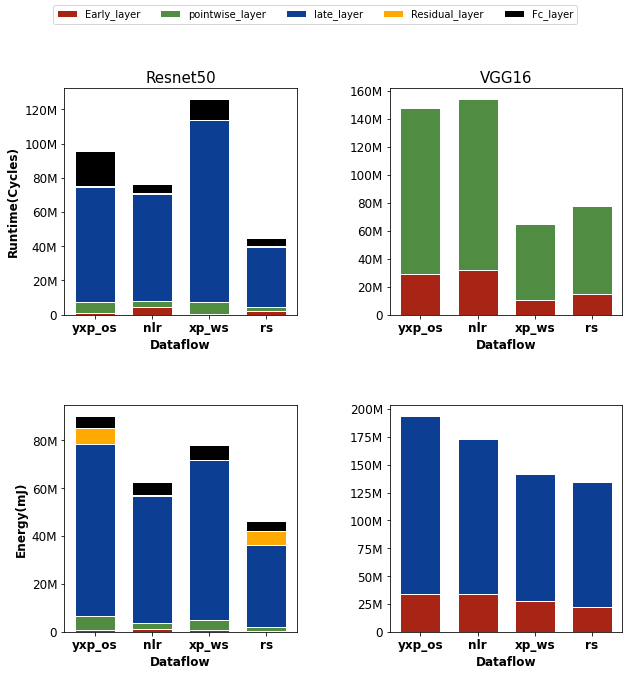

In [170]:
colors = ['#a82516', '#508c42','#0c3e94','#ffaa00','black']

# The position of the bars on the x-axis
r = range(len(x))
Width = 0.7
#plot bars
fig,plt1=plt.subplots(2,2,figsize=(10,10))



# plt.figure(1)
# plt1.figure(figsize=(10,7))

plt1[0,0].bar(r, RES_early, color=colors[0], edgecolor='white', width=Width, label="Early layers")
plt1[0,0].bar(r, RES_point, bottom=np.array(RES_early), color=colors[1], edgecolor='white', width=Width, label='Point_wise')
plt1[0,0].bar(r, RES_late, bottom=np.array(RES_early)+np.array(RES_point), color=colors[2], edgecolor='white', width=Width, label='Late layer')
plt1[0,0].bar(r, RES_residual, bottom=np.array(RES_early)+np.array(RES_point)+np.array(RES_late), color=colors[3], edgecolor='white', width=Width, label='Residual layer')
plt1[0,0].bar(r, RES_fclayer, bottom=np.array(RES_early)+np.array(RES_point)+np.array(RES_late)+np.array(RES_residual), color=colors[4], edgecolor='white', width=Width, label='FC')

ylabels = ['{:d}'.format(int(x)) + 'M' for x in plt1[0,0].get_yticks()/1000000]
ylabels[0]=0
plt1[0,0].set_yticklabels(ylabels)
# bottom, top = plt1.ylim()
# plt1.set (xticks(r, x, fontweight='normal'))
plt1[0,0].set_xticks([0,1, 2, 3])
plt1[0,0].set_xticklabels(x,fontweight="bold",size =15)
plt1[0,0].tick_params(labelsize=12)
# plt1.show()
plt1[0,0].set_ylabel('Runtime(Cycles)', fontdict=dict(weight='bold',size =12))
plt1[0,0].set_xlabel('Dataflow', fontdict=dict(weight='bold',size =12))



#plot bars
# plt.figure(2)
# plt2.figure(figsize=(10,7))
plt1[1,0].bar(r, RES_early_pow, color=colors[0], edgecolor='white', width=Width, label="Early Layers")
plt1[1,0].bar(r, RES_point_pow, bottom=np.array(RES_early_pow), color=colors[1], edgecolor='white', width=Width, label='Point_wise')
plt1[1,0].bar(r, RES_late_pow, bottom=np.array(RES_early_pow)+np.array(RES_point_pow), color=colors[2], edgecolor='white', width=Width, label='Late layer')
plt1[1,0].bar(r, RES_residual_pow, bottom=np.array(RES_early_pow)+np.array(RES_point_pow)+np.array(RES_late_pow), color=colors[3], edgecolor='white', width=Width, label='Residual layer')
plt1[1,0].bar(r, RES_fclayer_pow, bottom=np.array(RES_early_pow)+np.array(RES_point_pow)+np.array(RES_late_pow)+np.array(RES_residual_pow), color=colors[4], edgecolor='white', width=Width, label='FC')

plt1[1,0].set_xticks([0,1, 2, 3])
plt1[1,0].set_xticklabels(x,fontweight="bold",size =15)
plt1[1,0].tick_params(labelsize=12)
plt1[1,0].set_ylabel('Energy(mJ)', fontdict=dict(weight='bold',size =12))
plt1[1,0].set_xlabel('Dataflow', fontdict=dict(weight='bold',size =12))
# plt2.set(xlabel = "Dataflow")
plt1[0,0].set_title("Resnet50", fontsize=15)
ylabels = ['{:d}'.format(int(x)) + 'M' for x in plt1[0,0].get_yticks()/1000000]
ylabels[0]=0
plt1[1,0].set_yticklabels(ylabels)



plt1[0,1].bar(r, vgg16_early, color=colors[0], edgecolor='white', width=Width, label="Early layers")
plt1[0,1].bar(r, vgg16_late, bottom=np.array(vgg16_early), color=colors[1], edgecolor='white', width=Width, label='Late layer')


ylabels = ['{:d}'.format(int(x)) + 'M' for x in plt1[0,1].get_yticks()/1000000]
ylabels[0]=0
plt1[0,1].set_yticklabels(ylabels)
# plt1.set (xticks(r, x, fontweight='normal'))
plt1[0,1].set_xticks([0,1, 2, 3])
plt1[0,1].set_xticklabels(x,fontweight="bold",size =15)
plt1[0,1].tick_params(labelsize=12)
# plt1.show()
# plt1[0,1].set_ylabel('Runtime(Cycles)', fontdict=dict(weight='bold',size =12))
plt1[0,1].set_xlabel('Dataflow', fontdict=dict(weight='bold',size =12))



#plot bars
# plt.figure(2)
# plt2.figure(figsize=(10,7))

plt1[1,1].bar(r, vgg16_early_pow, color=colors[0], edgecolor='white', width=Width, label="Early_layers")
plt1[1,1].bar(r, vgg16_late_pow, bottom=np.array(vgg16_early_pow), color=colors[2], edgecolor='white', width=Width, label='Late layer')

plt1[1,1].set_xticks([0,1, 2, 3])
plt1[1,1].set_xticklabels(x,fontweight="bold",size =15)
plt1[1,1].tick_params(labelsize=12)
plt1[0,1].set_title("VGG16", fontsize=15)
plt1[1,1].set_xlabel('Dataflow', fontdict=dict(weight='bold',size =12))
# fig.suptitle("title",horizontalalignment='center', verticalalignment='bottom')
fig.legend( labels, loc='upper center',ncol=5,fontsize=10)
ylabels = ['{:d}'.format(int(x)) + 'M' for x in plt1[1,1].get_yticks()/1000000]
ylabels[0]=0
plt1[1,1].set_yticklabels(ylabels)
fig.subplots_adjust(hspace = 0.4,wspace=0.4)
fig.savefig('../abhishek.png',orientation='portrait')

plt.show()




For Resnet 50 Row stationay(RS) gave better results than the other dataflow types for both energy efficiency and runtime cycles. This can be a result of the model beign more adaptable for the RS dataflow. But in case of VGG16 xp_ws gave better result in runtime and rs gave better result in energy efficiency. This proves that not all dataflow types can accomadate all the models in both energy efficiency and runtime. 

Resnet beign more complex model better fits with the slower temporal map and faster spatial mapping. I think is was the reason for the model to have lesser runtime in RS. It also has multiple 1x1convolution which can benifit from Row stationary. which also contributed to the energy efficiency of the model. Kepping a particular row of data can be used accross the m,ultiple layer with same Conv operation that can help benfit the model

VGGNET having lesser layers and not much data reuse on the row side the weights of the model was more used and therfore xp_ws performed betteR. bUT WHEN IT CAME TO ENERGY EFFICIENCY THE WEIGHTS HAVE TO BE LOAD FOR EVERY CHANGE SO IT WAS NOT PERFORMING BETTER